# Project 3: Forecasting

In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
series = pd.read_csv('20.csv', header=0, index_col=0)
series = series.drop(["2m Relative Humidity (percent)", "2m Station Pressure (mb)"] , axis = 1)

## Task 1

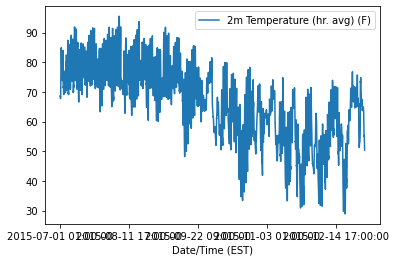

In [3]:
series.plot()

In [4]:
def difference(dataset):
    diff = list()
    for i in range(len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return diff

In [5]:
diff = difference(series["2m Temperature (hr. avg) (F)"])
# def inverse_difference(last_ob, value):
#     return value + last_ob
# inverted = [inverse_difference(series["2m Temperature (hr. avg) (F)"][i], diff[i]) for i in range(len(diff))]

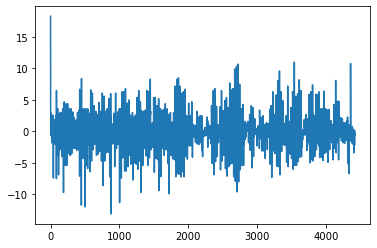

In [6]:
data = pd.Series(diff)
data.plot()

https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/

## Task 2

In [7]:
training = data[:len(data)//2]
testing = data[len(data)//2:]

In [8]:
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
# # prepare situation
# X = training
# errors = []
# for k in range(1, 20):
#     window = k
#     history = [X[i] for i in range(window)]
#     test = [X[i] for i in range(window, len(X))]
#     print(len(history), len(window))
#     predictions = list()
#     for t in range(len(test)):
#         length = len(history)
#         yhat = mean([history[i] for i in range(length-window,length)])
#         obs = test[t]
#         predictions.append(yhat)
#         history.append(obs)
#     error = mean_squared_error(test, predictions)
#     errors.append(error)

In [16]:
errors = []
for k in range(1, 200):
    rolling = training.rolling(window=k)
    rolling_mean = rolling.mean()
    error = mean_squared_error(training[:-k], rolling_mean[k:])
    errors.append(error)

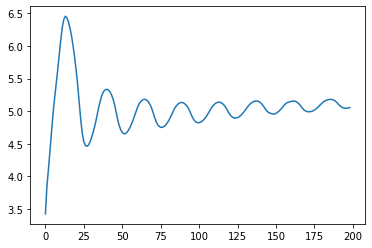

In [17]:
pd.Series(errors).plot()

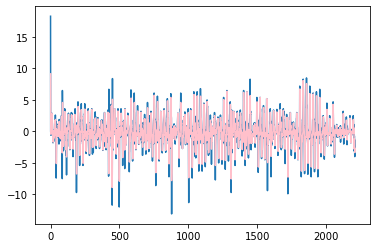

In [22]:
rolling = training.rolling(window=2)
rolling_mean = rolling.mean()
training.plot()
rolling_mean.plot(color='pink')
pyplot.show()

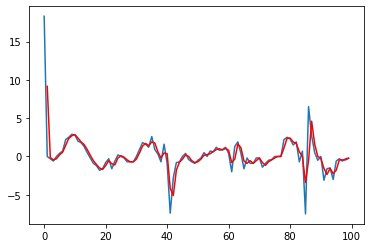

In [24]:
pyplot.plot(training[0:100])
pyplot.plot(rolling_mean[0:100], color='red')

https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/

## Task 3
https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788

In [25]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [31]:
errors = []
for level in range(1,10):
    model = SimpleExpSmoothing(training)
    # model._index = pd.to_datetime(train.index)
    fit1 = model.fit(smoothing_level=level *0.1)
    # pred1 = fit1.forecast(1000)
    pred1 = fit1.predict(1,len(training))
    error = mean_squared_error(training, pred1)
    errors.append(error)
#     pyplot.plot(training[:20])
#     pyplot.plot(pred1[:20])
#     pyplot.show()
#     pyplot.close()

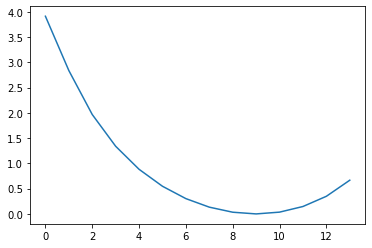

In [30]:
pd.Series(errors).plot()

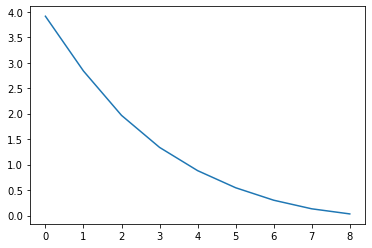

In [32]:
pd.Series(errors).plot()

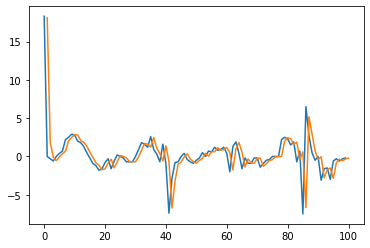

In [35]:
# pyplot.plot(fit1.fittedvalues)
pyplot.plot(training[:100])
pyplot.plot(pred1[:100])